<left><img width=25% src="img/gw_monogram_2c.png"></left>

# Lecture 6-Part I: Discriminative vs. Generative Algorithms

### CS6364/CS4364 Machine Learning
__Sardar Hamidian__<br>The George Washington Universiry

__Armin Mehrabian__<br>The George Washington Universiry

# Part 1: Generative Models

In this lecture, we are going to look at generative algorithms and their applications to classification.

We will start by defining the concept of a generative *model*.

# Review: Components of A Supervised Machine Learning Problem

At a high level, a supervised machine learning problem has the following structure:

$$ \underbrace{\text{Training Dataset}}_\text{Attributes + Features} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

# Rebabilistic Models

A (parametric) probabilistic model with parameters $\theta$ is a probability distribution
$$P_\theta(x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1].$$
This model can approximate the data distribution $\mathbb{P}(x,y)$.

If we know $P_\theta(x,y)$, we can compute predictions using the formula 
$$P_\theta(y|x) = \frac{P_\theta(x,y)}{P_\theta(x)} = \frac{P_\theta(x,y)}{\sum_{y \in \mathcal{Y}} P_\theta(x, y)}.$$

# Review: Maximum Likelihood Learning

In order to fit probabilistic models, we use the following objective:
$$ \max_\theta \mathbb{E}_{x, y \sim \mathbb{P}_\text{data}} \log P_\theta(x, y). $$
This seeks to find a model that assigns high probability to the training data.

# Review: Conditional Probabilistic Models

Alternatively, we may define a model of the conditional probability distribution:
$$P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1].$$

These are trained using conditional maximum likelihood:
$$ \max_\theta \mathbb{E}_{x, y \sim \mathbb{P}_\text{data}} \log P_\theta(y|x). $$
This seeks to find a model that assigns high conditional probability to the target $y$ for each $x$.

Logistic regression is an example of this approach.

# Discriminative vs. Generative Models

These two types of models are also known as *generative* and *discriminative*.
\begin{align*}
\underbrace{P_\theta(x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{generative model} & \;\; & \underbrace{P_\theta(y|x) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{discriminative model}
\end{align*}

* The models parametrize different kinds of probabilities
* They involve different training objectives and make different predictions
* Their uses are different (e.g., prediction, generation); more later!

# Classification Dataset: Iris Flowers

To demonstrate the two approaches, we are going to use the Iris flower dataset. 

It's a classical dataset originally published by [R. A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. Nowadays, it's widely used for demonstrating machine learning algorithms.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris(as_frame=True)

# print part of the dataset
iris_X, iris_y = iris.data, iris.target
pd.concat([iris_X, iris_y], axis=1).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


If we only consider the first two feature columns, we can visualize the dataset in 2D.

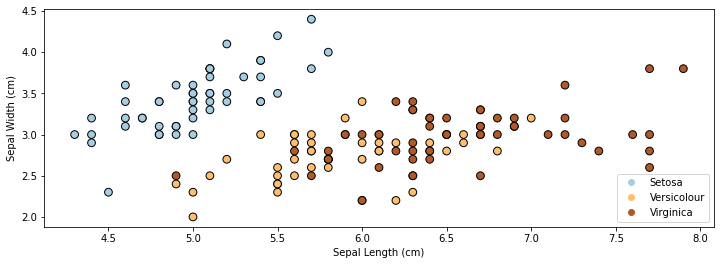

In [2]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

# create 2d version of dataset
X = iris_X.to_numpy()[:,:2]
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Plot also the training points
p1 = plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolor='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(handles=p1.legend_elements()[0], labels=['Setosa', 'Versicolour', 'Virginica'], loc='lower right')

# Example: Discriminative Model

An example of a discriminative model is logistic or softmax regression.
* Discriminative models directly partition the feature space into regions associated with each class and separated by a decision boundary.

* Given features $x$, discriminative models directly map to predicted classes (e.g., via the function $\sigma(\theta^\top x)$ for logistic regression).

Text(0, 0.5, 'Sepal width')

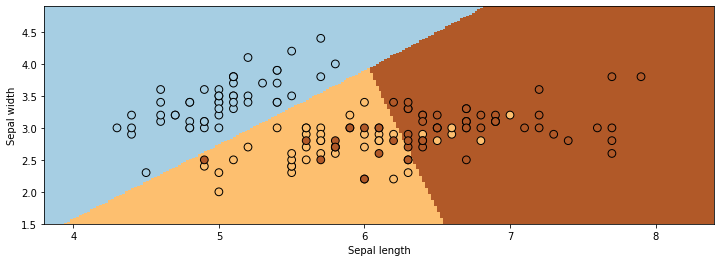

In [3]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5, multi_class='multinomial')

# Create an instance of Softmax and fit the data.
logreg.fit(X, iris_y)
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=iris_y, edgecolors='k', s=60, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Example: Generative Model

Generative modeling can be seen as taking a different approach:
1. In the Iris example, we first build a model of how each type of flower looks, i.e. we can learn the distribution
$$ p(x | y=k) \; \text{for each class $k$}.$$
It defines a model of how each flower is *generated*, hence the name.

2. Given a new flower datapoint $x'$, we can match it against each flower model and find the type of flower that looks most similar to it. Mathematically, this corresponds to:
\begin{align*}
\arg \max_y \log p(y | x) & = \arg \max_y \log \frac{p(x | y) p(y)}{p(x)} \\
& = \arg \max_y \log p(x | y) p(y),
\end{align*}
where we have applied Bayes' rule in the first line.

# Generative vs. Discriminative Approaches

How do we know which approach is better?
* If we only care about prediction, we don't need a model of $P(x)$. We can solve precisely the problem we care about.
    * Discriminative models will often be more accurate.

* If we care about other tasks (generation, dealing with missing values, etc.) or if we know the true model is generative, we want to use the generative approach.

More on this later!